# Задание 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy.stats import norm, shapiro, bartlett, ttest_ind, kstest, chi2_contingency

In [ ]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Задание 2

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Выводы:

В данных 1338 наблюдений

Средний возраст клиентов +- 39 лет

Средний BMI +- 30.66 (что указывает на избыточный вес)

Средние страховые расходы +- 13270 USD

Большинство клиентов не имеют детей (75% имеют 0-1 ребенка)

Большинство клиентов не курят

# Задание 3

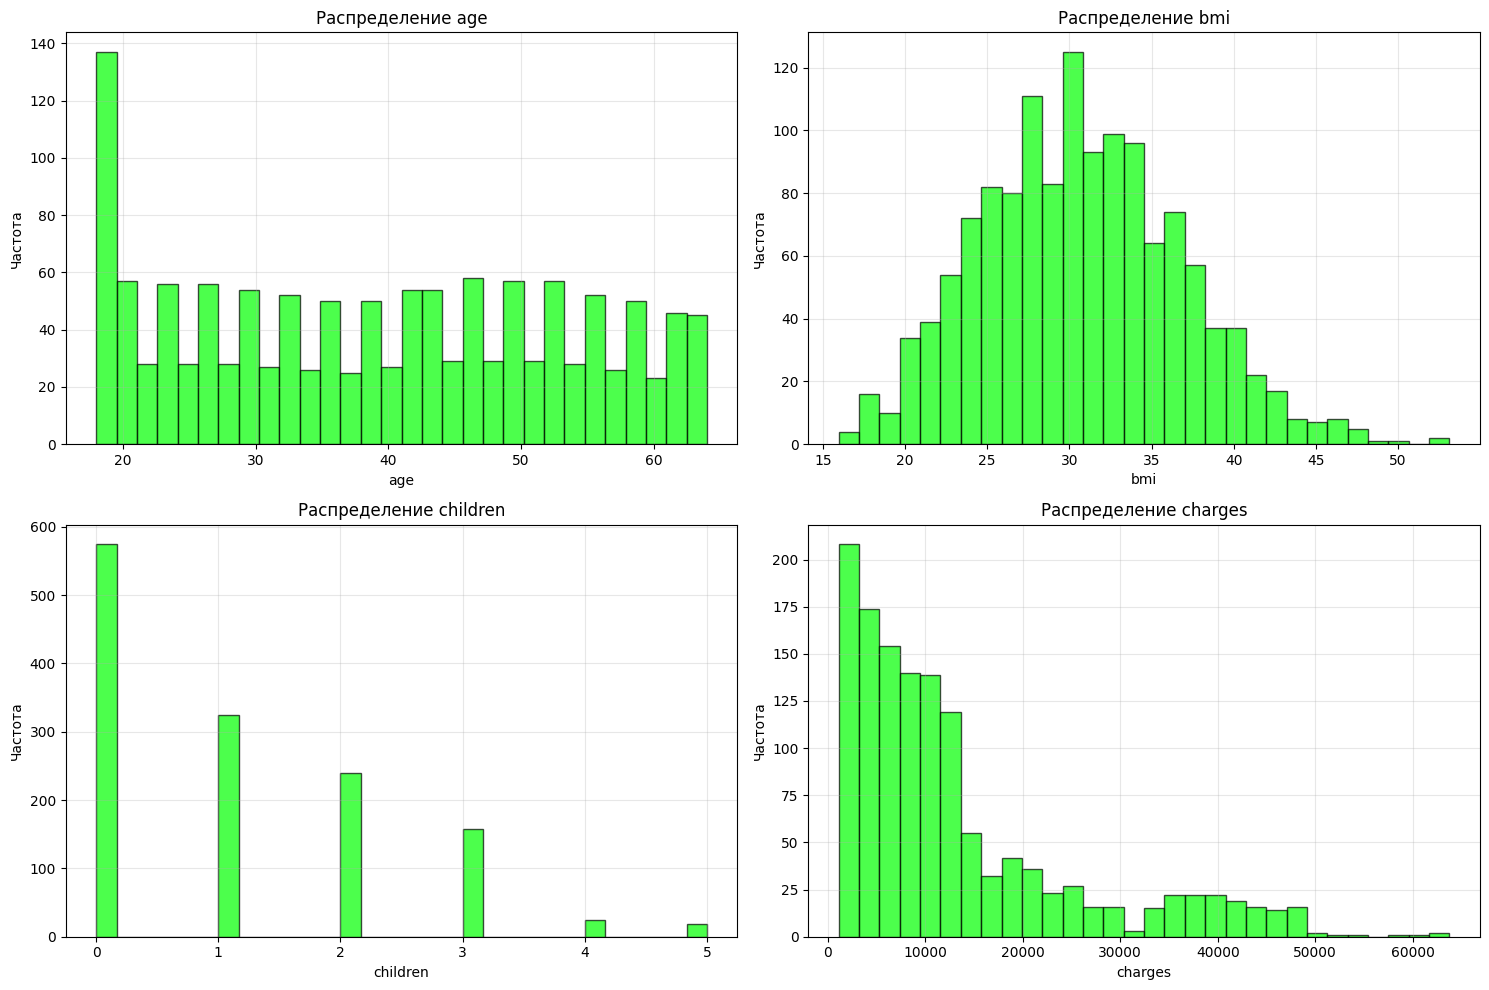

In [ ]:
# Гистограммы для всех числовых признаков
numeric_cols = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col], bins=30, color='lime', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Выводы:

Age: Распределение относительно равномерное с пиками на круглых возрастах

BMI: Распределение близко к нормальному с центром около 30

Children: Дискретное распределение, большинство клиентов без детей или с 1 ребенком

Charges: Сильно правоскошенное распределение с длинным хвостом больших значений

# Задание 4

Статистика для BMI
mean: 30.66
median: 30.40
mode: 32.30
std: 6.10
var: 37.19
range: 37.17
q1: 26.30
q3: 34.69
iqr: 8.40

Статистика для Charges
mean: 13270.42
median: 9382.03
mode: 1639.56
std: 12110.01
var: 146652372.15
range: 62648.55
q1: 4740.29
q3: 16639.91
iqr: 11899.63


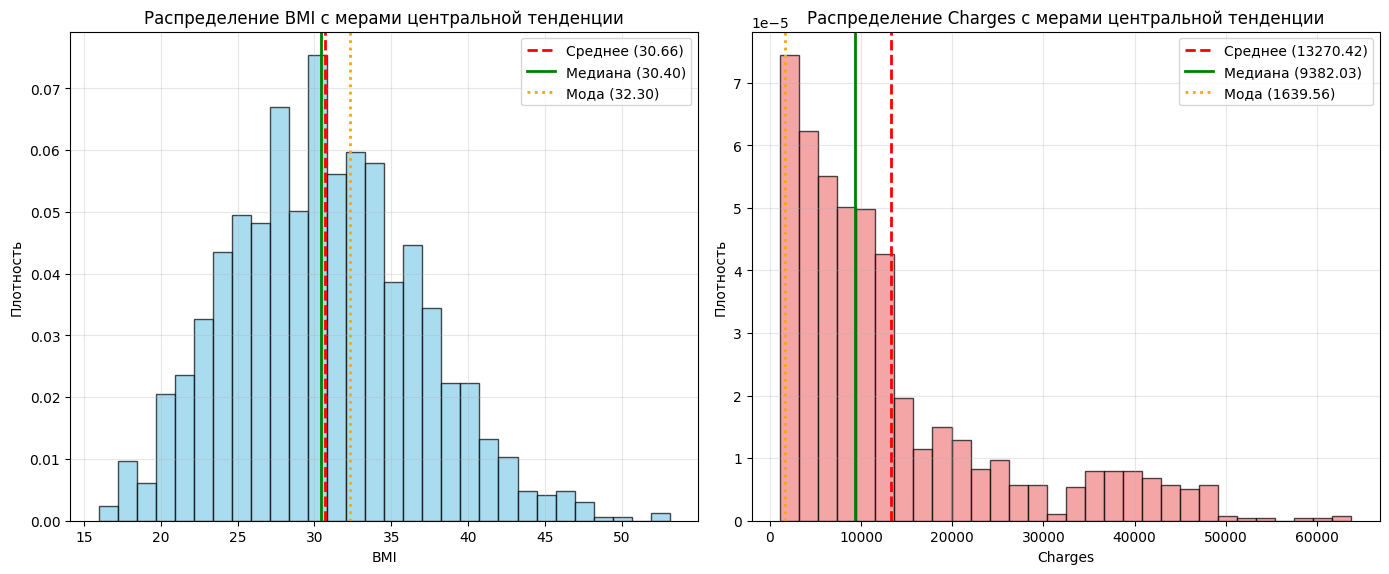

In [ ]:
def calculate_statistics(series, name):
    stats = {}
    stats['mean'] = np.mean(series)
    stats['median'] = np.median(series)
    stats['mode'] = sts.mode(series, keepdims=True).mode[0]
    stats['std'] = np.std(series, ddof=1)
    stats['var'] = np.var(series, ddof=1)
    stats['range'] = series.max() - series.min()
    stats['q1'] = np.percentile(series, 25)
    stats['q3'] = np.percentile(series, 75)
    stats['iqr'] = stats['q3'] - stats['q1']

    print(f"Статистика для {name}")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")

    return stats

# Статистика для BMI
stats_bmi = calculate_statistics(data['bmi'], 'BMI')
print()
# Статистика для Charges
stats_charges = calculate_statistics(data['charges'], 'Charges')

# Построение гистограмм с мерами центральной тенденции
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для BMI
ax[0].hist(data['bmi'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
ax[0].axvline(stats_bmi['mean'], color='red', linestyle='--', linewidth=2, label=f'Среднее ({stats_bmi["mean"]:.2f})')
ax[0].axvline(stats_bmi['median'], color='green', linestyle='-', linewidth=2, label=f'Медиана ({stats_bmi["median"]:.2f})')
ax[0].axvline(stats_bmi['mode'], color='orange', linestyle=':', linewidth=2, label=f'Мода ({stats_bmi["mode"]:.2f})')
ax[0].set_title('Распределение BMI с мерами центральной тенденции')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Плотность')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Гистограмма для Charges
ax[1].hist(data['charges'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7, density=True)
ax[1].axvline(stats_charges['mean'], color='red', linestyle='--', linewidth=2, label=f'Среднее ({stats_charges["mean"]:.2f})')
ax[1].axvline(stats_charges['median'], color='green', linestyle='-', linewidth=2, label=f'Медиана ({stats_charges["median"]:.2f})')
ax[1].axvline(stats_charges['mode'], color='orange', linestyle=':', linewidth=2, label=f'Мода ({stats_charges["mode"]:.2f})')
ax[1].set_title('Распределение Charges с мерами центральной тенденции')
ax[1].set_xlabel('Charges')
ax[1].set_ylabel('Плотность')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Выводы:

BMI: Распределение близко к нормальному, все три меры центральной тенденции близки друг к другу

Charges: Сильное правостороннее смещение - медиана значительно меньше среднего, что указывает на наличие выбросов с высокими значениями

# Задание 5

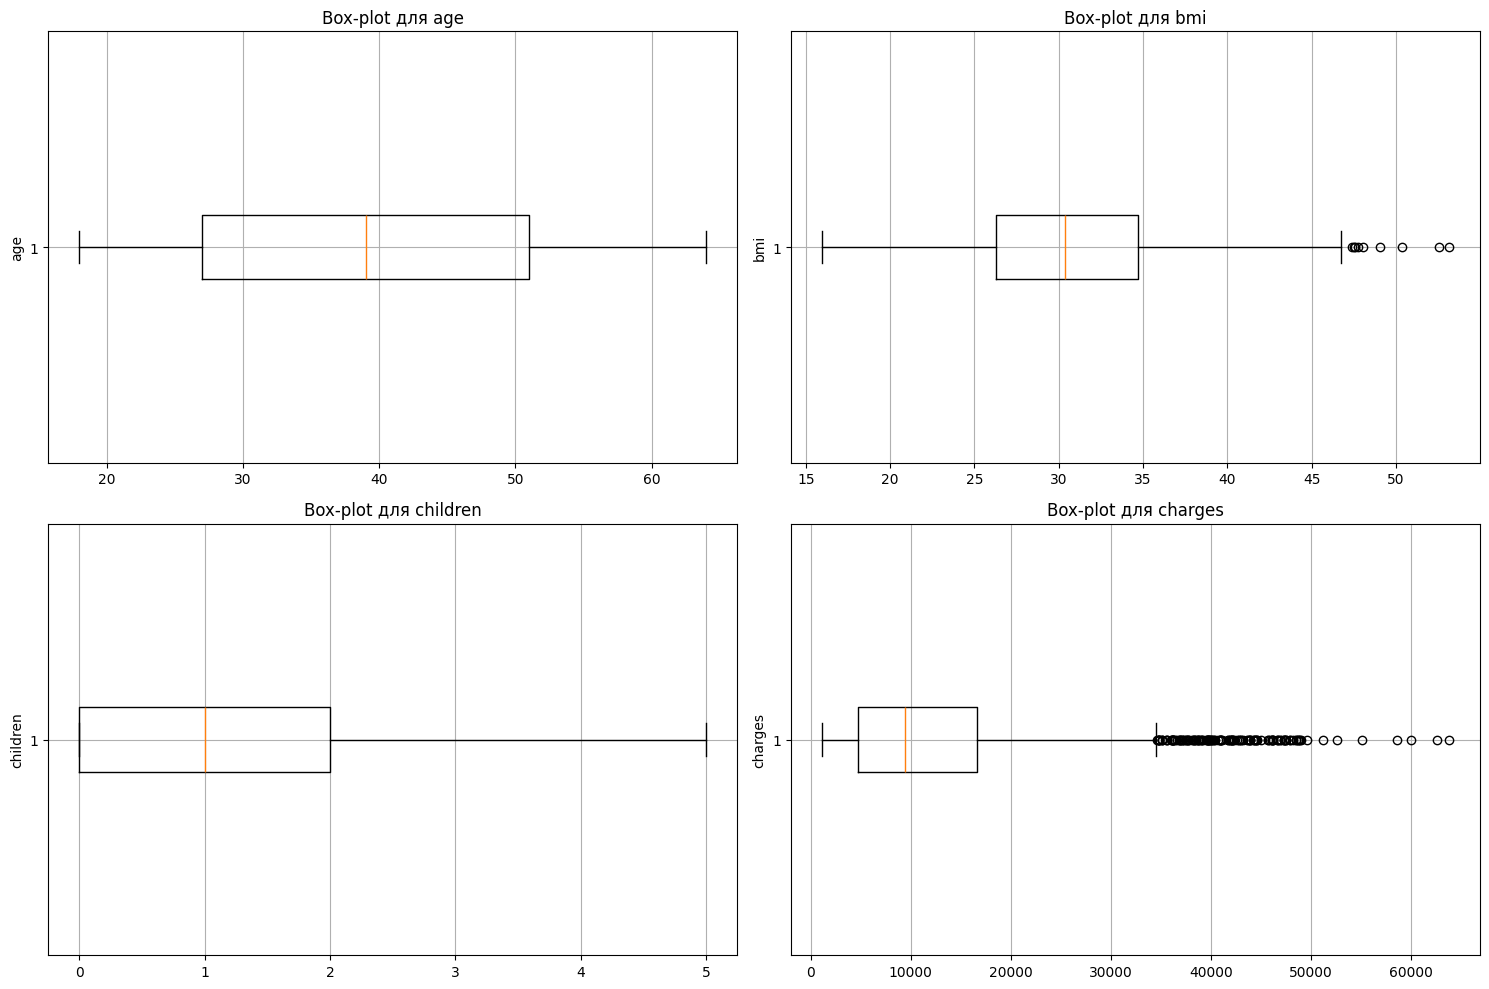

Количество выбросов в charges:  139


In [ ]:
# Box-plot для всех числовых признаков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(f'Box-plot для {col}')
    axes[i].set_ylabel(col)
    axes[i].grid()

plt.tight_layout()
plt.show()

# Детальный анализ выбросов для charges
Q1_charges = data['charges'].quantile(0.25)
Q3_charges = data['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges
lower_bound = Q1_charges - 1.5 * IQR_charges
upper_bound = Q3_charges + 1.5 * IQR_charges

outliers_charges = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]
print("Количество выбросов в charges: ", len(outliers_charges))

Выводы:

Age: Нет выбросов, равномерное распределение

BMI: Несколько выбросов в верхней части (высокий BMI)

Children: Нет выбросов, дискретное распределение

Charges: Много выбросов в верхней части - высокие страховые выплаты

# Задание 6

Проверка ЦПТ для BMI
Среднее генеральной совокупности: 30.66
Стандартное отклонение генеральной совокупности: 6.10
n = 10: SE эмпирическое = 1.92, SE теоретическое = 1.93
n = 30: SE эмпирическое = 1.03, SE теоретическое = 1.11
n = 100: SE эмпирическое = 0.63, SE теоретическое = 0.61


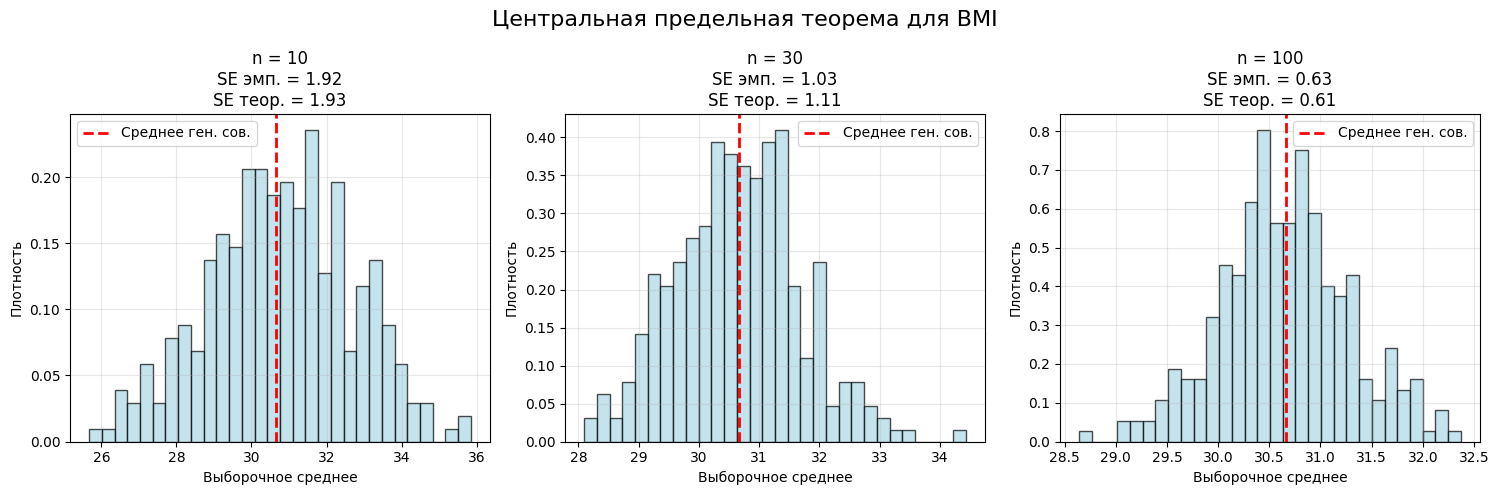

In [ ]:
def check_clt(series, name, sample_sizes=[10, 30, 100], n_samples=300):
    fig, axes = plt.subplots(1, len(sample_sizes), figsize=(15, 5))
    population_mean = series.mean()
    population_std = series.std(ddof=1)

    print(f"Проверка ЦПТ для {name}")
    print(f"Среднее генеральной совокупности: {population_mean:.2f}")
    print(f"Стандартное отклонение генеральной совокупности: {population_std:.2f}")

    for i, n in enumerate(sample_sizes):
        sample_means = []
        for _ in range(n_samples):
            sample = np.random.choice(series, size=n, replace=True)
            sample_means.append(sample.mean())

        sample_means = np.array(sample_means)
        se_empirical = sample_means.std(ddof=1)
        se_theoretical = population_std / np.sqrt(n)

        axes[i].hist(sample_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7, density=True)
        axes[i].axvline(population_mean, color='red', linestyle='--', linewidth=2, label='Среднее ген. сов.')
        axes[i].set_title(f'n = {n}\nSE эмп. = {se_empirical:.2f}\nSE теор. = {se_theoretical:.2f}')
        axes[i].set_xlabel('Выборочное среднее')
        axes[i].set_ylabel('Плотность')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

        print(f"n = {n}: SE эмпирическое = {se_empirical:.2f}, SE теоретическое = {se_theoretical:.2f}")

    plt.suptitle(f'Центральная предельная теорема для {name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Проверка ЦПТ для bmi
check_clt(data['bmi'], 'BMI')

Выводы: Центральная предельная теорема подтверждается - с увеличением размера выборки:

Распределение выборочных средних приближается к нормальному

Стандартная ошибка уменьшается

Эмпирическая и теоретическая стандартные ошибки близки друг к другу

# Задание 7

In [ ]:
def confidence_interval(series, confidence=0.95):
    n = len(series)
    mean = series.mean()
    std = series.std(ddof=1)
    se = std / np.sqrt(n)

    if confidence == 0.95:
        z = 1.96
    elif confidence == 0.99:
        z = 2.58
    else:
        z = norm.ppf(1 - (1 - confidence) / 2)

    lower = mean - z * se
    upper = mean + z * se

    return lower, upper, mean, se

# Доверительные интервалы для charges
ci_95_charges = confidence_interval(data['charges'], 0.95)
ci_99_charges = confidence_interval(data['charges'], 0.99)

# Доверительные интервалы для bmi
ci_95_bmi = confidence_interval(data['bmi'], 0.95)
ci_99_bmi = confidence_interval(data['bmi'], 0.99)

print("Доверительные интервалы")
print(f"Charges 95% ДИ: [{ci_95_charges[0]:.2f}, {ci_95_charges[1]:.2f}]")
print(f"Charges 99% ДИ: [{ci_99_charges[0]:.2f}, {ci_99_charges[1]:.2f}]")
print(f"BMI 95% ДИ: [{ci_95_bmi[0]:.2f}, {ci_95_bmi[1]:.2f}]")
print(f"BMI 99% ДИ: [{ci_99_bmi[0]:.2f}, {ci_99_bmi[1]:.2f}]")

Доверительные интервалы
Charges 95% ДИ: [12621.53, 13919.31]
Charges 99% ДИ: [12416.27, 14124.58]
BMI 95% ДИ: [30.34, 30.99]
BMI 99% ДИ: [30.23, 31.09]


# Задание 8

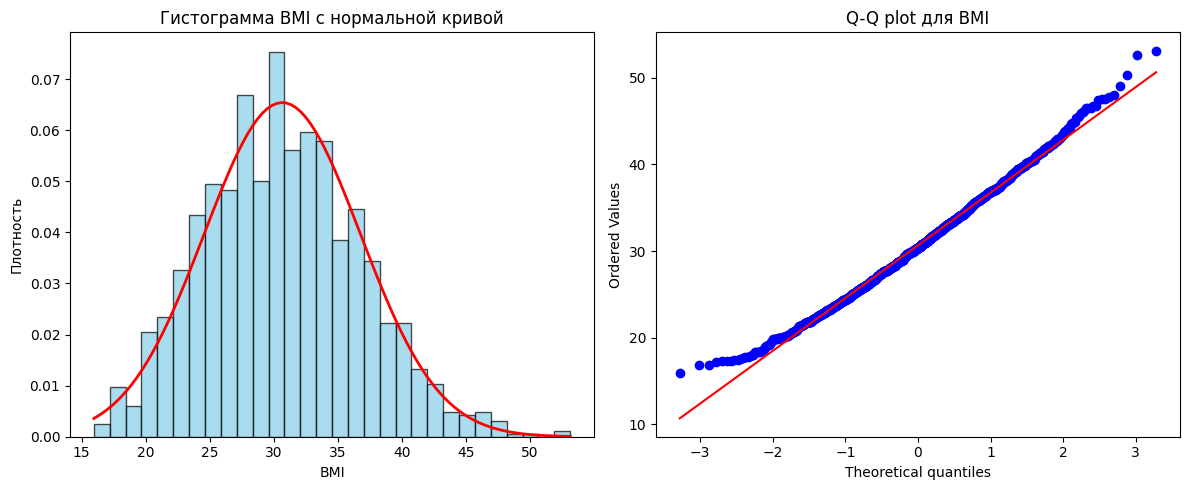

Проверка нормальности для BMI
Тест Колмогорова-Смирнова: статистика = 0.0261, p-value = 0.3163
Тест Шапиро-Уилка: статистика = 0.9939, p-value = 0.0000

Гипотезы:
H0: Распределение соответствует нормальному
H1: Распределение не соответствует нормальному
p-value (0.3163) > 0.05 - нет оснований отвергать H0


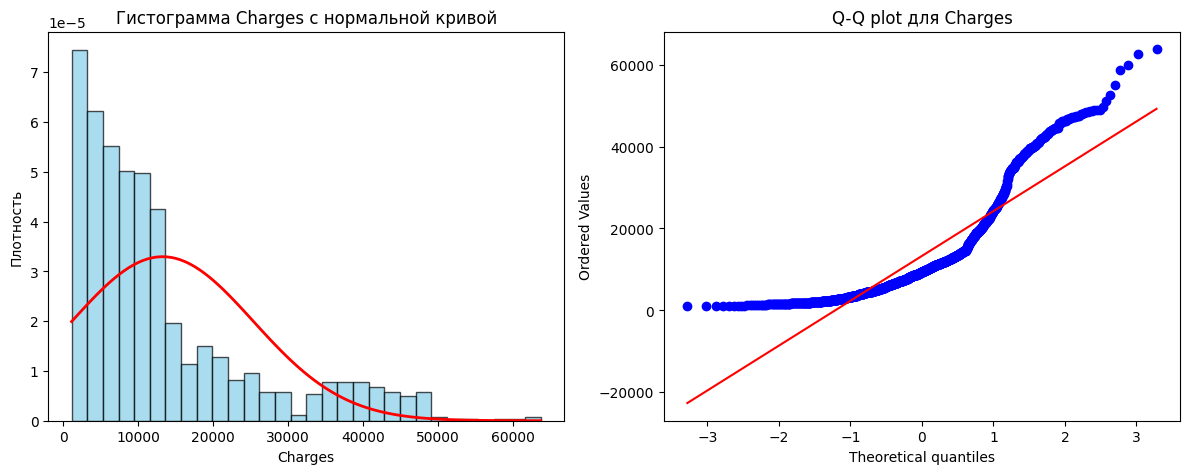

Проверка нормальности для Charges
Тест Колмогорова-Смирнова: статистика = 0.1885, p-value = 0.0000
Тест Шапиро-Уилка: статистика = 0.8147, p-value = 0.0000

Гипотезы:
H0: Распределение соответствует нормальному
H1: Распределение не соответствует нормальному
p-value (0.0000) ≤ 0.05 - отвергаем H0 в пользу H1


In [ ]:
def normality_test(series, name):
    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = kstest((series - series.mean()) / series.std(ddof=1), 'norm')

    # Тест Шапиро-Уилка (для выборок < 5000)
    if len(series) <= 5000:
        shapiro_stat, shapiro_p = shapiro(series)
    else:
        shapiro_stat, shapiro_p = np.nan, np.nan

    # Q-Q plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Гистограмма с нормальной кривой
    ax1.hist(series, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    x = np.linspace(series.min(), series.max(), 100)
    ax1.plot(x, norm.pdf(x, series.mean(), series.std(ddof=1)), 'r-', linewidth=2)
    ax1.set_title(f'Гистограмма {name} с нормальной кривой')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Плотность')

    # Q-Q plot
    sts.probplot(series, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q plot для {name}')

    plt.tight_layout()
    plt.show()

    print(f"Проверка нормальности для {name}")
    print(f"Тест Колмогорова-Смирнова: статистика = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    if not np.isnan(shapiro_p):
        print(f"Тест Шапиро-Уилка: статистика = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

    # Формулировка гипотез
    print()
    print("Гипотезы:")
    print("H0: Распределение соответствует нормальному")
    print("H1: Распределение не соответствует нормальному")

    alpha = 0.05
    if ks_p > alpha:
        print(f"p-value ({ks_p:.4f}) > {alpha} - нет оснований отвергать H0")
    else:
        print(f"p-value ({ks_p:.4f}) ≤ {alpha} - отвергаем H0 в пользу H1")

# Проверка нормальности для BMI
normality_test(data['bmi'], 'BMI')

# Проверка нормальности для Charges
normality_test(data['charges'], 'Charges')

# Задание 9

In [ ]:
ecdc_data = pd.read_csv("ECDCCases.csv")
ecdc_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


# Задание 10

In [ ]:
ecdc_data.isna().sum()

,0
dateRep,0
day,0
month,0
year,0
cases,0
deaths,0
countriesAndTerritories,0
geoId,275
countryterritoryCode,123
popData2019,123


In [ ]:
missing_percent = (ecdc_data.isna().sum() / len(ecdc_data)) * 100
print("Процент пропусков по признакам:")
print(missing_percent.sort_values(ascending=False))

Процент пропусков по признакам:
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
geoId                                                         0.444236
popData2019                                                   0.198695
countryterritoryCode                                          0.198695
year                                                          0.000000
month                                                         0.000000
day                                                           0.000000
dateRep                                                       0.000000
countriesAndTerritories                                       0.000000
deaths                                                        0.000000
cases                                                         0.000000
continentExp                                                  0.000000
dtype: float64


In [ ]:
# Удаление двух признаков с наибольшим количеством пропусков
columns_to_drop = missing_percent.nlargest(2).index
ecdc_cleaned = ecdc_data.drop(columns=columns_to_drop)
print(f"Удалены признаки: {list(columns_to_drop)}")

Удалены признаки: ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId']


In [ ]:
# Обработка оставшихся пропусков
for col in ecdc_cleaned.columns:
    if ecdc_cleaned[col].isna().sum() > 0:
        if ecdc_cleaned[col].dtype == 'object':
            ecdc_cleaned[col].fillna('other', inplace=True)
        else:
            ecdc_cleaned[col].fillna(ecdc_cleaned[col].median(), inplace=True)

print("Пропуски обработаны")
print(f"Осталось пропусков: {ecdc_cleaned.isna().sum().sum()}")

Пропуски обработаны
Осталось пропусков: 0


/tmp/ipython-input-3669344443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecdc_cleaned[col].fillna('other', inplace=True)
/tmp/ipython-input-3669344443.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

# Задание 11

In [ ]:
ecdc_data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04,59025.000000
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07,66.316369
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08,162.324550
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.561206
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [ ]:
ecdc_data.describe(include=['object'])

,dateRep,countriesAndTerritories,geoId,countryterritoryCode,continentExp
count,61904,61904,61629,61781,61904
unique,350,214,213,212,6
top,12/12/2020,Australia,AT,AUT,Europe
freq,214,350,350,350,17372


In [ ]:
high_death_days = ecdc_data[ecdc_data['deaths'] > 3000]
print("Дней с количеством смертей > 3000:", len(high_death_days))

if len(high_death_days) > 0:
    print("Страны с днями, где смертей > 3000:")
    high_death_countries = high_death_days.groupby('countriesAndTerritories').agg({
        'deaths': 'count',
        'dateRep': lambda x: list(x)[:3]  # первые 3 даты
    }).rename(columns={'deaths': 'count_days', 'dateRep': 'example_dates'})
    print(high_death_countries)

Дней с количеством смертей > 3000: 11
Страны с днями, где смертей > 3000:
                          count_days                         example_dates
countriesAndTerritories                                                   
Argentina                          1                          [02/10/2020]
Ecuador                            1                          [07/09/2020]
Mexico                             1                          [09/10/2020]
Peru                               2              [14/08/2020, 24/07/2020]
United_States_of_America           6  [12/12/2020, 10/12/2020, 03/12/2020]


# Задание 12

In [ ]:
ecdc_data.shape

(61904, 12)

In [ ]:
# Поиск дубликатов
duplicates = ecdc_data.duplicated().sum()
print("Найдено полных дубликатов:", duplicates)

# Удаление дубликатов
ecdc_no_duplicates = ecdc_data.drop_duplicates()
print("Размер данных после удаления дубликатов:", ecdc_no_duplicates.shape)

Найдено полных дубликатов: 4
Размер данных после удаления дубликатов: (61900, 12)


# Задание 13

In [ ]:
bmi_data = pd.read_csv("bmi.csv")
bmi_data

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


In [ ]:
# Создание выборок для northwest и southwest
bmi_nw = bmi_data[bmi_data['region'] == 'northwest']['bmi']
bmi_sw = bmi_data[bmi_data['region'] == 'southwest']['bmi']

print(f"Размер выборки northwest: {len(bmi_nw)}")
print(f"Размер выборки southwest: {len(bmi_sw)}")

# Проверка нормальности
shapiro_nw = shapiro(bmi_nw)
shapiro_sw = shapiro(bmi_sw)

print(f"Тест Шапиро-Уилка для northwest: p-value = {shapiro_nw[1]:.4f}")
print(f"Тест Шапиро-Уилка для southwest: p-value = {shapiro_sw[1]:.4f}")

# Проверка гомогенности дисперсий
bartlett_test = bartlett(bmi_nw, bmi_sw)
print(f"Тест Бартлетта: p-value = {bartlett_test[1]:.4f}")

# T-тест
t_test = ttest_ind(bmi_nw, bmi_sw, equal_var=True)
print(f"T-тест Стьюдента: p-value = {t_test[1]:.4f}")

# Интерпретация
alpha = 0.05
if shapiro_nw[1] > alpha and shapiro_sw[1] > alpha:
    print("Обе выборки имеют нормальное распределение")
else:
    print("Нарушено предположение о нормальности")

if bartlett_test[1] > alpha:
    print("Дисперсии гомогенны")
else:
    print("Дисперсии негомогенны")

if t_test[1] > alpha:
    print("Нет статистически значимых различий между средними BMI")
else:
    print("Есть статистически значимые различия между средними BMI")

Размер выборки northwest: 325
Размер выборки southwest: 325
Тест Шапиро-Уилка для northwest: p-value = 0.4656
Тест Шапиро-Уилка для southwest: p-value = 0.3630
Тест Бартлетта: p-value = 0.0652
T-тест Стьюдента: p-value = 0.0011
Обе выборки имеют нормальное распределение
Дисперсии гомогенны
Есть статистически значимые различия между средними BMI


# Задание 14

In [ ]:
# Данные о бросках кубика
observed = [97, 98, 109, 95, 97, 104]
expected = [100] * 6

# Критерий хи-квадрат
chi2_stat, p_value = sts.chisquare(observed, expected)

print("Критерий хи-квадрат для игральной кости")
print(f"Наблюдаемые частоты: {observed}")
print(f"Ожидаемые частоты: {expected}")
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Нет оснований отвергать гипотезу о равномерном распределении")
else:
    print("Распределение не является равномерным")

Критерий хи-квадрат для игральной кости
Наблюдаемые частоты: [97, 98, 109, 95, 97, 104]
Ожидаемые частоты: [100, 100, 100, 100, 100, 100]
Хи-квадрат статистика: 1.4400
p-value: 0.9199
Нет оснований отвергать гипотезу о равномерном распределении


# Задание 15

In [ ]:
# Создание датафрейма
data_employment = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})

data_employment.index = [
    'Полный рабочий день', 'Частичная занятость', 'Временно не работает',
    'На домохозяйстве', 'На пенсии', 'Учёба'
]

print("Таблица сопряженности:")
print(data_employment)

# Критерий хи-квадрат на независимость
chi2_stat, p_value, dof, expected = chi2_contingency(data_employment)

print(f"Критерий хи-квадрат на независимость")
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")

alpha = 0.05
if p_value > alpha:
    print("Семейное положение НЕ влияет на занятость (переменные независимы)")
else:
    print("Семейное положение влияет на занятость (переменные зависимы)")

Таблица сопряженности:
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22
Критерий хи-квадрат на независимость
Хи-квадрат статистика: 122.2965
p-value: 0.0000
Степени свободы: 10
Семейное положение влияет на занятость (переменные зависимы)
